In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


df = pd.read_csv('/content/loan_approval_dataset.csv')

In [4]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [5]:
encoder = LabelEncoder()

df['education'] = encoder.fit_transform(df['education'])
df['self_employed'] = encoder.fit_transform(df['self_employed'])
df['loan_status'] = encoder.fit_transform(df['loan_status'])  # Target variable


In [6]:
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)


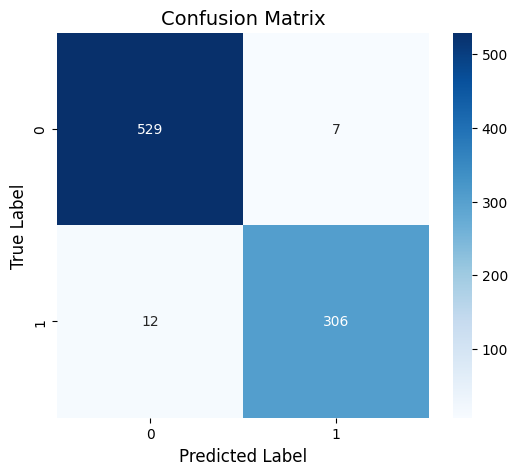

✅ Model Performance
Accuracy : 0.977751756440281
Precision: 0.9777506845946926
Recall   : 0.977751756440281
F1-Score : 0.977715253694394


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Predictions already done above: y_pred = rf_model.predict(X_test)

# Convert to strings (for consistency with labels)
y_true = [str(x) for x in y_test]
y_pred = [str(x) for x in y_pred]

# Auto-detect labels
labels = np.unique(y_true)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix (heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Metrics
print("✅ Model Performance")
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted", zero_division=0))
print("Recall   :", recall_score(y_true, y_pred, average="weighted"))
print("F1-Score :", f1_score(y_true, y_pred, average="weighted"))
